# XOR and perceptrons

## Single perceptron

A single perceptron cannot realise an XOR gate.

## Hidden layer

A hidden layer with a sigmoid activation can realise an XOR gate. This requires a hidden layer with two neurons, each of which is connected to the output layer. Inputs will be of shape (2,1) and can take values 0 or 1. Can solve this problem regression-style or classification-style with one-hot encoding i.e. a label for the result 0 and a separate label for the result 1 then taking the softmax of these two. Values reported before the softmax have the interpretation of being a probability or confidence in the answer.

Redo this question with sensible inputs. Random results are not sensible. Generate pairs of numbers that can be 1 or 0, apply a true XOR to each of these to find their true values, then pass these as training data to the network. Train for many epochs then pass a similar test set.

float64
(1000, 2)
float64
(1000, 1)
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4950 - loss: 0.6938
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5040 - loss: 0.6934
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5100 - loss: 0.6931
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5020 - loss: 0.6937
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5210 - loss: 0.6933
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5270 - loss: 0.6931
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5470 - loss: 0.6927
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5400 - loss: 0.6926
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5410 - loss: 0.6926
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5180 - loss: 0.6927
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5150 - loss: 0.6939
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━

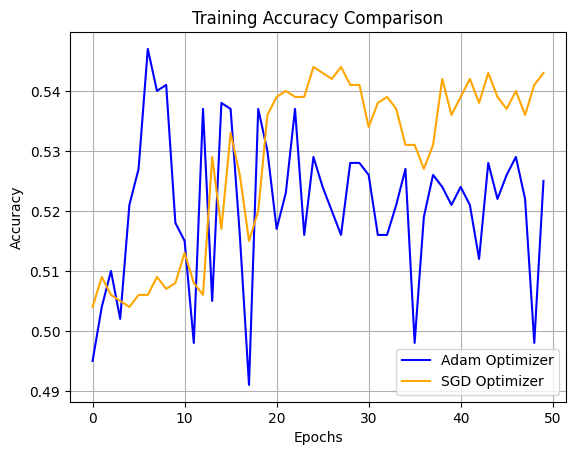

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

#CUDA_VISIBLE_DEVICES: "-1"

Adam_model = Sequential([tf.keras.layers.Dense(1, activation="sigmoid", input_shape=(2,), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None))])
#Adam_model = Sequential([tf.keras.layers.Dense(1, activation="sigmoid", input_shape=(2,), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-100, maxval=100, seed=None))])
Adam_model.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])
SGD_model = Sequential([tf.keras.layers.Dense(1, activation="sigmoid", input_shape=(2,), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None))])
#SGD_model = Sequential([tf.keras.layers.Dense(1, activation="sigmoid", input_shape=(2,), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-100, maxval=100, seed=None))])
SGD_model.compile(optimizer=SGD(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])
# Generate synthetic data
np.random.seed(0)
num_samples = 1000
X = np.random.rand(num_samples, 2)
print(X.dtype)
print(X.shape)
y = np.random.randint(0, 2, size=(num_samples, 1)).astype(np.float64)
print(y.dtype)
print(y.shape)
# Train both models
Adam_history = Adam_model.fit(X, y, epochs=50, batch_size=32, verbose=1)
weights_Adam, biases_Adam = Adam_model.layers[0].get_weights()
print("Weights Adam:", weights_Adam)
print("Biases Adam:", biases_Adam)
SGD_history = SGD_model.fit(X, y, epochs=50, batch_size=32, verbose=1)
weights_SGD, biases_SGD = SGD_model.layers[0].get_weights()
print("Weights SGD:", weights_SGD)
print("Biases SGD:", biases_SGD)
# Plot training accuracy
plt.plot(Adam_history.history['accuracy'], label='Adam Optimizer', color='blue')
plt.plot(SGD_history.history['accuracy'], label='SGD Optimizer', color='orange')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

